In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries and modules

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
from keras.models import Sequential #The Sequential class in Keras is used to build sequential models, which are a linear stack of layers.
from keras.layers import Dense #Dense class in Keras is used to add a fully connected layer to a neural network. It is a layer where each neuron in the layer is connected to every neuron in the previous layer.
from sklearn.model_selection import train_test_split #"train_test_split" function in scikit-learn is used to split a dataset into training and testing subsets.
from sklearn.preprocessing import StandardScaler #"StandardScaler" class in scikit-learn is used for standardizing numerical features in a dataset.

Import dataset

In [ ]:

# Load the wine quality dataset
wine_data = pd.read_csv('drive/My Drive/CSC 547/red-wine.csv')

TODO: Inspect the dataset

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Preprocess input data

In [ ]:
wine_data['quality'] = wine_data.quality.apply(lambda q: 0 if q <= 5 else 1)

In [ ]:
# Split the dataset into input features (X) and output (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [ ]:
# Normalize the input features
scaler = StandardScaler() #scaler is an instance of the "StandardScaler" class
X = scaler.fit_transform(X) #fit_transform method is used to compute the mean and standard deviation of each feature in X, and then transform X. resulting X matrix has zero mean and unit variance for each feature.

Standardization is a common preprocessing technique in machine learning that scales the values of each feature so that they have a mean of 0 and a standard deviation of 1. This is often desirable because many machine learning algorithms assume that the features are normally distributed and have the same scale.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#train_test_split function randomly splits the dataset into training and testing subsets  
#test_size parameter which is set to 0.2 in this case, indicating that 20% of the data will be used for testing
#random_state parameter is set to 42 to ensure that the random splitting is reproducible

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


Define model architecture

In [ ]:
# Create the Keras model
model = Sequential() #Sequential() function creates an empty model that can be modified by adding layers

In [ ]:
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) #add() method is used to add layers to the model
#64, specifies the number of neurons in the layer
#input_dim=X_train.shape[1], sets the input shape of the layer to the number of features in the training set
#activation='relu', specifies the activation function to be used in the layer

In [ ]:
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #output of this layer will be a probability between 0 and 1 

Compile model

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss='binary_crossentropy' - specifies the loss function to be used during training. Binary cross-entropy is a common loss function used for binary classification problems.
#optimizer='adam' - specifies the optimization algorithm. 
#metrics=['accuracy'] - specifies the evaluation metric to be used during training and testing. Accuracy is the ratio of the number of correct predictions to the total number of predictions made by the model

Fit model on training data

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
#fit method trains the model for a fixed number of epochs. In this case, model is trained for 50 epochs.
#batch_size=32 - the number of samples to be used in each batch during training. typically set as a power of 2, such as 32, 64, or 128
#history - contains information about the training process such as the loss and accuracy metrics for both the training and validation data

Epoch 1/5
40/40 [==============================] - 2s 9ms/step - loss: 0.6437 - accuracy: 0.6263 - val_loss: 0.5759 - val_accuracy: 0.7188
Epoch 2/5
40/40 [==============================] - 0s 5ms/step - loss: 0.5446 - accuracy: 0.7381 - val_loss: 0.5336 - val_accuracy: 0.7125
Epoch 3/5
40/40 [==============================] - 0s 4ms/step - loss: 0.5187 - accuracy: 0.7451 - val_loss: 0.5208 - val_accuracy: 0.7344
Epoch 4/5
40/40 [==============================] - 0s 4ms/step - loss: 0.5068 - accuracy: 0.7498 - val_loss: 0.5132 - val_accuracy: 0.7312
Epoch 5/5
40/40 [==============================] - 0s 3ms/step - loss: 0.4990 - accuracy: 0.7592 - val_loss: 0.5105 - val_accuracy: 0.7344


**iteration size** = (number of training examples) / (batch size) = 1279 / 32 = 39.97
iteration size refers to the number of passes through the entire training dataset that are needed to complete one epoch of training. <br>
Iteration size is not an integer in this case, so round up to the nearest integer. The iteration size in this case would be 40.

Evaluate model on test data

In [ ]:
score = model.evaluate(X_test, y_test)
#evaluate method computes the loss value and any other specified metrics for the test data
#score will contain the computed loss value and the accuracy metric for the test data

10/10 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7344


In [ ]:
score

[0.5105079412460327, 0.734375]

Visualize Accuracy and Loss

In [ ]:
import matplotlib.pyplot as plt

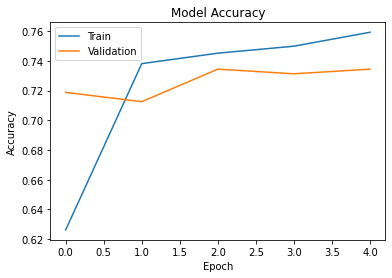

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

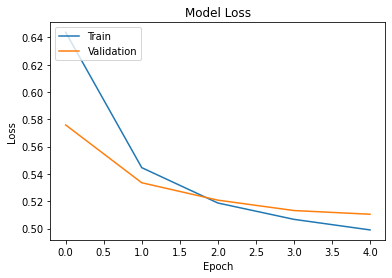

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

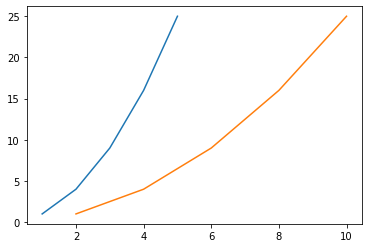

In [ ]:
#example of plot function
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

a = [2, 4, 6, 8, 10]
b = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.plot(a,b)
plt.show()